# Barrel of Oil vs Share of Exxon Mobile Stock Problem

## The question at hand:

**Doses the barrel of oil do a good job at predicting the share of Exxon Mobile stock?**


To answer this questions we're goint to use a Linear Regression Model(LRM), becouse of this reasons: 
1. We want to no the relationship between the two varaibles. 
2. We want to no the correlation between the varaibles (r2).
3. It will be a useful to have an equation to make prediction in the future. 

The equation of the LRM is:

$ y = \beta_0 + \beta_1x $

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coeficient for x


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

# Loading the Data

In [3]:
price = pd.read_excel('data/oil_exxon.xlsx')

In [4]:
price.head()

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88


Now we are going to make some change to organize the price dataframe

In [5]:
price.index

RangeIndex(start=0, stop=1256, step=1)

In [6]:
pd.to_datetime(price['date'])

0      2014-03-28
1      2014-03-31
2      2014-04-01
3      2014-04-02
4      2014-04-03
          ...    
1251   2019-03-19
1252   2019-03-20
1253   2019-03-21
1254   2019-03-22
1255   2019-03-25
Name: date, Length: 1256, dtype: datetime64[ns]

In [7]:
price.index = pd.to_datetime(price['date'])

In [8]:
price.head()

,date,exon_price,oil_price
date,,,
2014-03-28,2014-03-28,97.699997,106.64
2014-03-31,2014-03-31,97.680000,105.95
2014-04-01,2014-04-01,97.730003,105.70
2014-04-02,2014-04-02,97.949997,103.37
2014-04-03,2014-04-03,97.930000,104.88


# Cleaning the data

Steps to clean the data:
> 1. Check the data types, to be sure they are correct. 
> 2. Make sure the column names are correct.
> 3. Check for and drop/fill missing values.

Now we'are gone create a dictionary object where the old name is the key, and the new name is the value for that key.

In [9]:
# define the new name.
new_columns = {'exon_price': 'exxon_price'}

# rename the column
price = price.rename(columns = new_columns)
price.head()

,date,exxon_price,oil_price
date,,,
2014-03-28,2014-03-28,97.699997,106.64
2014-03-31,2014-03-31,97.680000,105.95
2014-04-01,2014-04-01,97.730003,105.70
2014-04-02,2014-04-02,97.949997,103.37
2014-04-03,2014-04-03,97.930000,104.88


In [10]:
# Dropint the duplicate data column
price.drop('date', axis=1, inplace=True)

In [11]:
price

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
...,...,...
2019-03-19,80.870003,67.13
2019-03-20,81.320000,68.35
2019-03-21,81.790001,68.30


Now we're goin to look if we have missing values in our data set

In [12]:
price.isna().head()

,exxon_price,oil_price
date,,
2014-03-28,False,False
2014-03-31,False,False
2014-04-01,False,False
2014-04-02,False,False
2014-04-03,False,False


In [13]:
price.isna().any()

exxon_price    False
oil_price       True
dtype: bool

In [14]:
price.isna().sum()

exxon_price    0
oil_price      8
dtype: int64

Now we're going to drop the missing values and make sure every missing values has been removed.

In [15]:
price = price.dropna()

In [16]:
price.isna().sum()

exxon_price    0
oil_price      0
dtype: int64

# Exploring the Data

The exploration fase will help us to figure out:
    
1. How the data is distributed
2. If there is a relationship wtween the to variables
3. If we have outliers
4. If the data is skewed

**Scatter Plot**

In [17]:
price.columns

Index(['exxon_price', 'oil_price'], dtype='object')

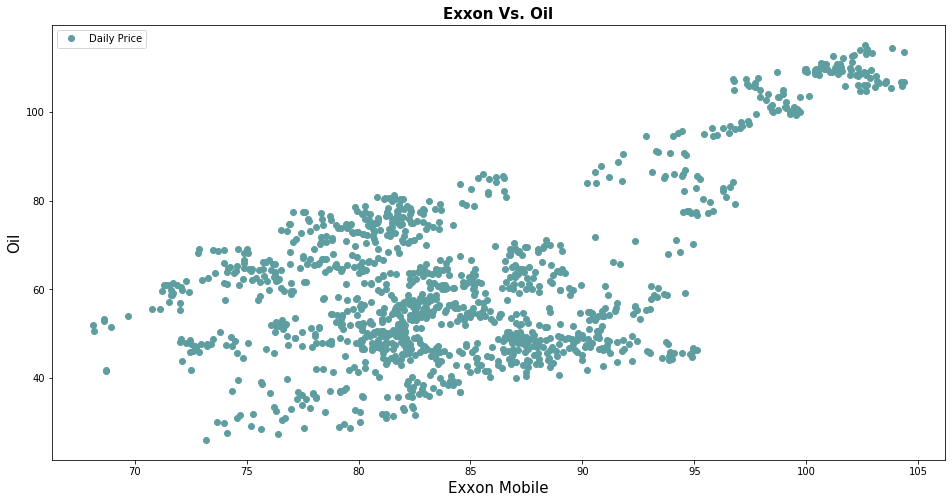

In [18]:
# Defining the x and y data.
x = price['exxon_price']
y = price['oil_price']

# Plot creation
fig, ax = plt.subplots(figsize=(16,8))

# Ploting the data
ax.plot(x, y, 'o', color='cadetblue', label='Daily Price' )

# Customizing
ax.set_title('Exxon Vs. Oil', fontsize=15, fontweight='bold')
ax.set_xlabel('Exxon Mobile', fontsize=15)
ax.set_ylabel('Oil', fontsize=15)
ax.legend()

plt.show()

**Measuring the Correlation**

In [19]:
# let's measure that correlation
price.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


This is the criteria to mesure a correlation:
- Very strong relationship ( $|r|$ > 0.8 $\geq$ )
- Strong relationship ( 0.6 $ \leq |r|$ )
- Moderate relationship ( 0.4 $ \leq |r|$ )
- Weak relationship ( 0.2 $ \leq |r|$ )
- Very weak relationship ( $ |r|$ )

## Create a Statistical Summary

In [20]:
# Statical summary with describe()
price.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


## Checking for Outliers and Skewness

Outliers are not good becouse they could impact results in our Linear Regression model. 

Things we could do to identigy outliers and skews:
> 1. Plot the histogram of the data 
> 2. Calculating the excess kurtosis
> 3. Calculating the skewness

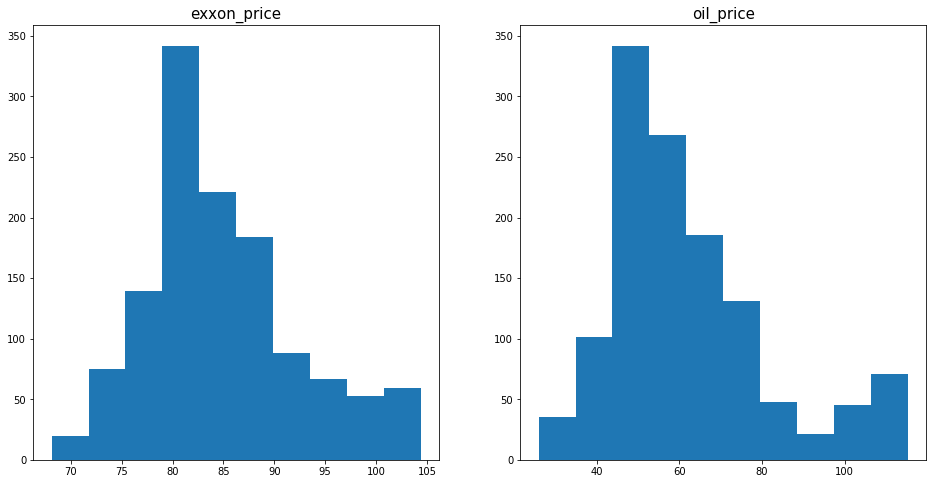

In [21]:
# Building the histogram

# Plot creation
fig, (ax1, ax2) = plt.subplots(figsize=(16,8), nrows=1, ncols=2)

# Ploting the data
ax1.hist(price['exxon_price'])
ax2.hist(price['oil_price'])

# Customize the plot 1
ax1.set_title('exxon_price', fontsize=15)
# Customize the plot 2
ax2.set_title('oil_price', fontsize=15)

plt.show()

Litle bit of theory of how to:

> * [My notes on Matplotlib](http://localhost:8888/notebooks/matplolib_project/intro_to_matplotlib.ipynb)
> * [Onile resource: RealPython](https://realpython.com/python-histograms/)

**An easy way of doing a histogram is doing this:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD4F1C0>,
      dtype=object)

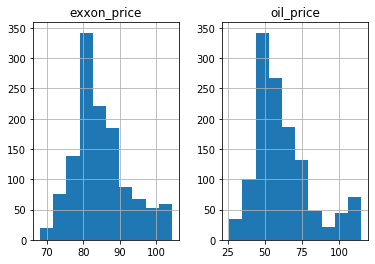

In [22]:
price.hist()

In [23]:
# Calculating the excess mutosis using fisher method.
exxon_kurtosis = kurtosis(price['exxon_price'], fisher=True)
oil_kurtosis = kurtosis(price['oil_price'], fisher = True)

display(f"Exxon Excess Kurtosis:{exxon_kurtosis:.3f}")
display(f"Oil Excess Kurtosis: {oil_kurtosis:.3f}")

'Exxon Excess Kurtosis:0.088'

'Oil Excess Kurtosis: 0.532'

In [24]:
# Calculate the skewness
exxon_skew = skew(price['exxon_price'])
oil_skew = skew(price['oil_price'])

display(f"Exxon Skew:{exxon_skew:.3f}")
display(f"Oil Skew:{oil_skew:.3f}")

'Exxon Skew:0.660'

'Oil Skew:1.024'

In [25]:
# perform a kurtosis test
display("Exxon:", stats.kurtosistest(price['exxon_price']))
display("Oil:", stats.kurtosistest(price['oil_price']))

'Exxon:'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil:'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

In [26]:
# perform a skew test
display("Exxon", stats.skewtest(price['exxon_price']))
display("Oil", stats.skewtest(price['oil_price']))

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159925e-35)

***

**Kurtosis**
- Any distribution with **kurtosis ≈3 (excess ≈0)** is called mesokurtic. This is a normal distribution
- Any distribution with **kurtosis <3 (excess kurtosis <0)** is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with **kurtosis >3 (excess kurtosis >0)** is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

***

**Skewness**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric.

Links with the Theory:
> * [Prueba de normalidad: Coeficiente de asimetría y curtosis](https://help.gooddata.com/doc/es/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/predictive-statistical-use-cases/normality-testing-skewness-and-kurtosis)
> * [Measures of Skewness and Kurtosis](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)

# Building the Model

Now that we finish the data exploration, and there is no annomaly other than the data being slightly skewed. 
We feel confident enough to move forward building our Linear Regression Model. 
***


## Spliting the data

To this we will have to remember again the problem at hand:

**Doses the barrel of oil do a good job at predicting the share of Exxon Mobile stock?**

Remembering this question we can figure out that the independent variable (X) will be the Oil price and the dependent variable (y) will be Exxon Mobile stock price

In [27]:
# defining input and output variable
X = price[['oil_price']]
y = price.drop('oil_price', axis=1)

In [28]:
X.head()

,oil_price
date,
2014-03-28,106.64
2014-03-31,105.95
2014-04-01,105.70
2014-04-02,103.37
2014-04-03,104.88


In [29]:
y.head()

,exxon_price
date,
2014-03-28,97.699997
2014-03-31,97.680000
2014-04-01,97.730003
2014-04-02,97.949997
2014-04-03,97.930000


In [30]:
# Split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

**Understanding the split_test**

In [31]:
len(X), len(y)

(1248, 1248)

In [32]:
len(X)*0.7, len(X)*0.3

(873.5999999999999, 374.4)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((873, 1), (375, 1), (873, 1), (375, 1))

## Creating and Fitting the model

In [34]:
# Creating a Linear Regression model object
regression_model = LinearRegression()

# Fitting the model
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Exploring the Output

In this part we're goint to figure out the inconitas in the regression Equation. 

$ y = \beta_0 + \beta_1x $

We need:
- $\beta_0$ $\rightarrow$ The intercept
- $\beta_1$ $\rightarrow$ The coeficient for x

We have: 
- $x$  $\rightarrow$ The feature

We wanna predict:
- $y$ $\rightarrow$ The response



In [35]:
# Let's get the The intercept and the Coefficient of X
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

display(f"The intercept for the model is {intercept:.2f}")
display(f"The coefficient for the model is {coefficient:.2f}")

'The intercept for the model is 70.01'

'The coefficient for the model is 0.24'

**To interprate the coefficient we will say that a a single unit increase in oil is associated with a 0.24 increase in the price of Exxon Mobile stock.**

Now our equation will look like this:
                        $ y = 70.01 + 0.24x $

## Taking a single prediction

Let's make a simple example, with an output we already now, to confirm the Equation.

In [36]:
# Looking the end of the original data set, to get the oil price
price.tail(2)

,exxon_price,oil_price
date,,
2019-03-22,80.480003,66.29
2019-03-25,79.919998,67.37


In [37]:
# Let's test a prediction
prediction = regression_model.predict([[67.37]])
prediction = prediction[0][0]
display(f"The predicted value is {prediction:.2f}")

'The predicted value is 85.96'

This value mean, that given a barrel oil for 67.37 we would predict Exxon Mobile to be trading for 85.95. 

We can see that our model is not perfect, we will have to evaluate the model, to get more info about this output. Now let's make multiple predictions.

## Making Multiple Predictions at Once

We are goint to use or testing data (X_test) to do this part of the Exercise.

In [38]:
X_test.head()

,oil_price
date,
2017-08-29,51.64
2017-01-25,54.34
2017-06-02,48.46
2015-12-15,37.66
2015-03-06,59.15


In [39]:
# Getting multiple prediction
y_predict = regression_model.predict(X_test)
y_predict[:5]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])

To be sure how accurate is our model we will have to evaluate it.

## Evaluating the Model

Firts of all we are goint to calculate the coefficient and the intercept again, but using the `statsmodels.api`, just to show that `sklearn` is not the unique way...

In [40]:
X.head(2)

,oil_price
date,
2014-03-28,106.64
2014-03-31,105.95


In [41]:
# define our intput
X2 =  sm.add_constant(X)
X2.head(2)

,const,oil_price
date,,
2014-03-28,1.0,106.64
2014-03-31,1.0,105.95


In [42]:
# Create a OLS(Ordinary least squares) model
model = sm.OLS(y, X2)
model

In [43]:
# Fittig the data
est = model.fit()
est

### Confidence Intervals

Now we're goint to calculete the confidence intervals. By default this value is 95% intervals.

In [44]:
# Making some cofidence intervals, 95% by default.
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


Let's interpretate the output:

With a 95% of confidence the oil_price coefficient exitst between 0.214372 and 0.24856

> * If we want a narrower range, we only need to Decreace the confidence
> * If we want a wider range, we only need to Increase the confidence


## Hypothisis Testing

Let's explain a little bit of theory applying the problem at hand.

* **Null Hypothesis:** There is no relationship between the price of oil and the price of Exxon. 
    * The coefficient equals to 0. 
 
 * **Alternative Hypothesis:** There is a relationship between the price of oil and the price of Exxon. 
     * The coefficient does not equal to 0. 
     
    
* If we reject the null, we are saying there is a relationship, and the coefficient does not equal to 0.
* If we fail to reject the null. we are saying there is no relationship, and the coefficient does equal to 0.

In [45]:
# Estimating the p-values
est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

P-values represent the probability that the coefficient is equal to 0.

If we have a p-values less than 0.05 we can reject the null hypothesis. This is our case, so we can reject the null hypothesis and say that there is a relationship between oil price and Exxon Mobile Stock. 

# Model Fit

Now we are going to examine how well out data fit the model. To do this we gonna use `y_predictions` and compare them with the real values (`y_actuals`). If we make the diference between y_predictions and y_actual we will get residuals values. 

With the `y_test` and `y_predict` we can quantify how well our model fits the data using this metrics:

> * **Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This metric gives an idea of the magnitud but it does not the you the direction (too hig o too low?).
> * **Mean Squared Error (MSE):** Is the mean of the Squared Error. This is useful becouse MSE punishes more the significant erros.
> * **Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors.
> * **R-Squared:** Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. 

To calculate this metrics we gonna ude sklearn

In [57]:
# Calculating the MSE
MSE_model = mean_squared_error(y_test, y_predict)

# Calculating the MAE
MAE_model = mean_absolute_error(y_test, y_predict)

# Calculating the MSE
RMSE_model = math.sqrt(MSE_model)

# Calculating the R^2 
R2_model = r2_score(y_test, y_predict)

# Let's display the output
print(f" MSE:  {MSE_model:.2f}")
print(f" MAE:  {MAE_model:.2f}")
print(f" RMSE: {RMSE_model:.2f}")
print(f" R2:   {R2_model:.2f}")

 MSE:  38.44
 MAE:  5.03
 RMSE: 6.20
 R2:   0.31


## Create a Summary of the Model Output

statsmodel.api allow us to calculate some statistics values like the R-Squared, Adj. R-squared, and more... We can do this just getting the summary of or fitted model wit statsmodel.

Let's see this in acction

In [59]:
# printtin the output summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          1.42e-123
Time:                        19:58:00   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

With this summary we have some metrics we calculated with sklear, and we also have some additional metric the `t-value`  which is the coefficient divided by the standard error. The higher the t-value, the more evidence we have to reject the null hypothesis.

## Plot the Residuals

Now we are goint to see how te residual values are distributed..

In [61]:
# Let's calculate de residuals
y_residual = y_test - y_predict
y_residual.head()

,exxon_price
date,
2017-08-29,-5.785306
2017-01-25,2.465486
2017-06-02,-1.982458
2015-12-15,0.504373
2015-03-06,1.616750


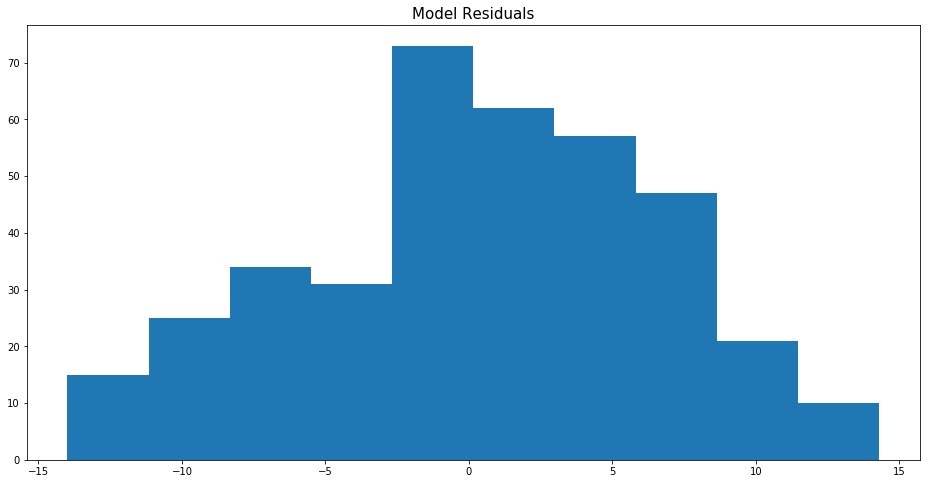

In [68]:
# ploting the residuals

# Building the histogram

# Plot creation
fig, ax = plt.subplots(figsize=(16,8))

# Ploting the data
ax.hist(y_residual['exxon_price'])

# Customize the plot 1
ax.set_title('Model Residuals', fontsize=15)

plt.show()

## Plotting our Line

It will be a good idea to plot the Linear regression line, so let's do this

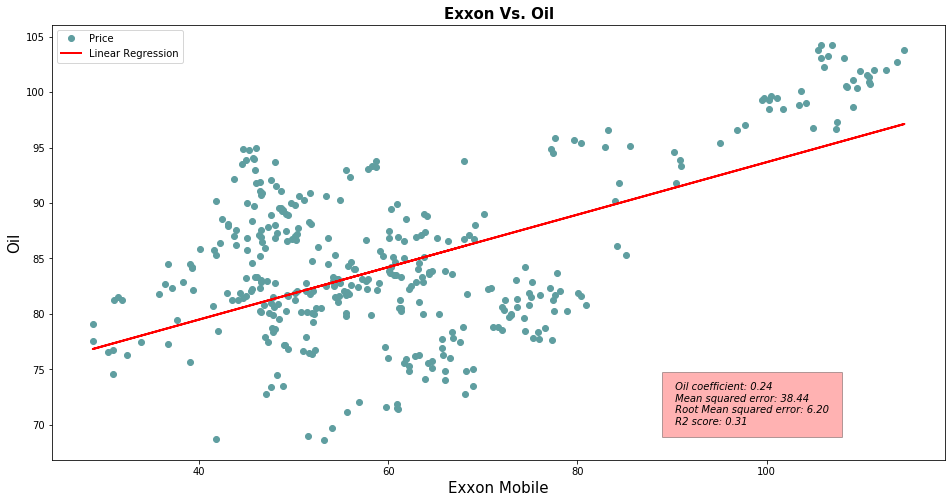

In [104]:
# Plot creation
fig, ax = plt.subplots(figsize=(16,8))

# Ploting the data
ax.plot(X_test, y_test, 'o', color='cadetblue', label='Price' )
ax.plot(X_test, y_predict, color='red', label='Linear Regression', linewidth=2, linestyle= '-' )

# Customizing
ax.set_title('Exxon Vs. Oil', fontsize=15, fontweight='bold')
ax.set_xlabel('Exxon Mobile', fontsize=15)
ax.set_ylabel('Oil', fontsize=15)
ax.legend()

# A Text inside the legend
ax.text(90, 70, f" Oil coefficient: {coefficient:.2f}  \n Mean squared error: {MSE_model:.2f} \n Root Mean squared error: {RMSE_model:.2f} \n R2 score: {R2_model:.2f} " ,
        style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
# DO the same line by line
    #ax.text(90, 71, f"Mean squared error: {MSE_model:.2f}")
    #ax.text(90, 72, f"Root Mean squared error: {RMSE_model:.2f}")
    #ax.text(90, 73, f"R2 score: {R2_model:.2f}")

plt.show()

# Save the Model for future use
It is good Idea to do this if we need this model in the future.

We are going to use pickle to do this...

In [106]:
import pickle

# pickling the model
with open('exxon_vs_oil.sav', 'wb') as f:
    pickle.dump(regression_model,f)

In [107]:
# loading the model back
with open('exxon_vs_oil.sav', 'rb') as pickle_file:
    regression_model_2 = pickle.load(pickle_file)

In [108]:
# Making a new predictions
regression_model_2.predict([[67.33]])

array([[85.94980965]])

As we can se the model has been saved properly. 


***

**The data and the project there are just for learning porpouse.** 

You can get [The original project](https://github.com/areed1192/sigma_coding_youtube/tree/master/python/python-data-science/machine-learning/simple-linear-regression) in this link, is from Sigma_Coding a [Youtube channel](https://www.youtube.com/channel/UCBsTB02yO0QGwtlfiv5m25Q) that provides great content.